In [1]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
from wiki_utils import get_soup, get_href_list, get_word_from_href

In [2]:
WIKI_HOME_URL = 'https://en.wikipedia.org'

In [3]:
fname = "wiki_graph.pkl"
try:
    wiki_graph = nx.read_gpickle(fname)
except:
    wiki_graph = nx.Graph()

In [4]:
SEARCH_WORD = 'South_Asia'
while(True):
    print(SEARCH_WORD)
    URL = f'{WIKI_HOME_URL}/wiki/{SEARCH_WORD}'  
    soup = get_soup(URL)    
    href_list = get_href_list(soup)
    next_word_list = get_word_from_href(href_list)
    print(next_word_list)
    next_word = next_word_list[0]
    if next_word in wiki_graph.nodes():
        wiki_graph.add_edge(SEARCH_WORD, next_word)  
        break
    
    wiki_graph.add_edge(SEARCH_WORD, next_word)  
    SEARCH_WORD = next_word    

South_Asia
['Geography', 'Culture', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri_Lanka', 'Indian_Plate', 'Himalayas', 'Karakoram', 'Pamir_Mountains', 'Amu_Darya', 'Hindu_Kush']


In [5]:
wiki_graph.nodes(), list(wiki_graph.neighbors(SEARCH_WORD))

(NodeView(('Kolkata', 'List_of_renamed_Indian_cities_and_states', 'British_Raj', 'Hindi_language', 'Devanagari', 'IAST', 'Romanisation', 'Linguistics', 'Scientific_method', 'Empirical_evidence', 'Proposition', 'Logic', 'Reason', 'Consciousness', 'Sentience', 'Emotion', 'Mental_state', 'Mind', 'Phenomenon', 'Greek_language', 'Modern_Greek', 'Dialect', 'Latin', 'Classical_language', 'Language', 'Communication', 'London', 'Capital_city', 'Municipality', 'Administrative_division', 'Sovereign_state', 'Polity', 'Collective_identity', 'Belongingness', 'New_York_City', 'New_York_(state)', 'U.S._state', 'United_States', 'North_America', 'Continent', 'Landmass', 'Region', 'Geography', 'Ancient_Greek', 'United_Kingdom', 'Great_Britain', 'Island', 'Atoll', 'Coral_reef', 'Ecosystem', 'Abiotic_component', 'Biology', 'Science', 'Latin_language', '18th_century', 'Roman_numerals', 'Numeral_system', 'Writing_system', 'Russia', 'Transcontinental_country', 'Country', 'China', 'Simplified_Chinese_character

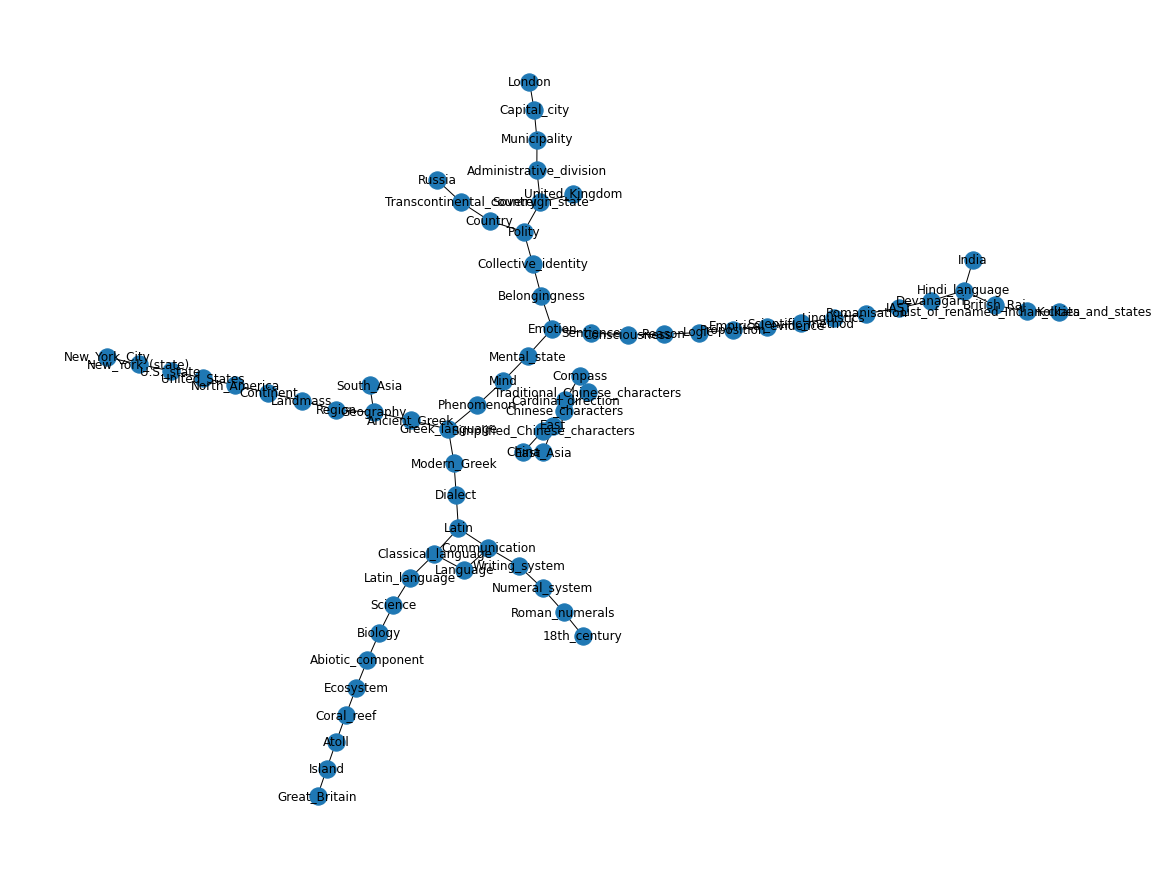

In [6]:
plt.figure(figsize=(16, 12))
nx.draw_kamada_kawai(wiki_graph, with_labels=True)

In [7]:
fname = "wiki_graph.pkl"
nx.write_gpickle(wiki_graph, fname)

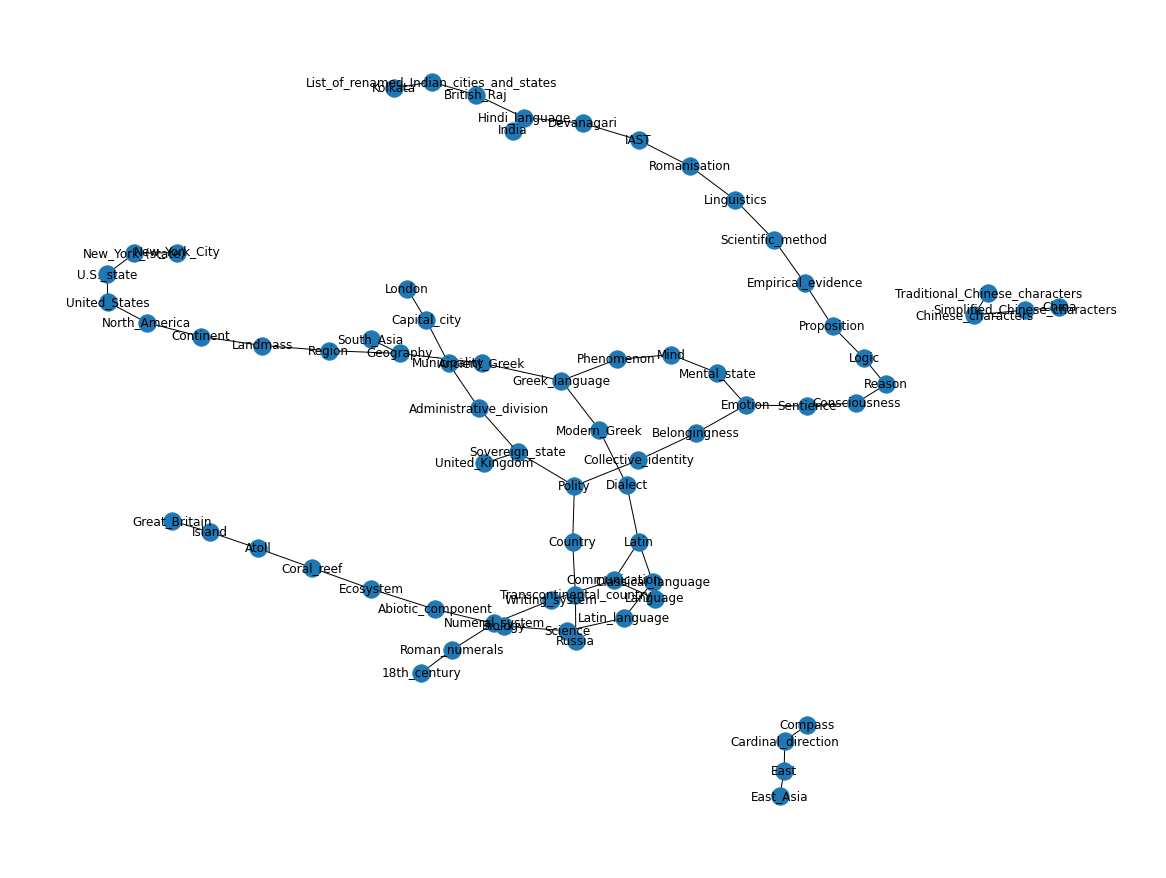

In [8]:
plt.figure(figsize=(16, 12))
nx.draw(wiki_graph, with_labels=True)